In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
## Draw 100 random samples from a uniform distribution
## btwn 0 and 1
x1 = np.random.uniform(0, 1, 100)
x2 = 0.5 * x1 + (np.random.normal(0, 1, 100) / 10)
y = 2 + (2 * x1) + (0.3 * x2) + (np.random.normal(0, 1, 100))
x1.shape, x2.shape, y.shape

((100,), (100,), (100,))

(array([ 9.,  9., 13., 10.,  8.,  9.,  8., 13., 10., 11.]),
 array([0.01862306, 0.11664975, 0.21467644, 0.31270314, 0.41072983,
        0.50875652, 0.60678321, 0.70480991, 0.8028366 , 0.90086329,
        0.99888998]),
 <BarContainer object of 10 artists>)

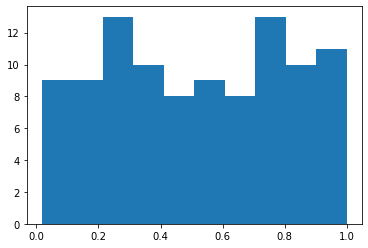

In [3]:
plt.hist(x1)

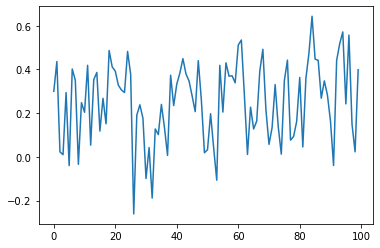

In [4]:
plt.plot(x2)

# Q1
Write out the form of the linear model. Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 $$

In [5]:
## fit OLS model
X = np.column_stack((x1,x2))
## add col of ones
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     20.06
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           5.10e-08
Time:                        10:55:14   Log-Likelihood:                -152.17
No. Observations:                 100   AIC:                             310.3
Df Residuals:                      97   BIC:                             318.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7236      0.234      7.369      0.000       1.259       2.188
x1             2.4331      0.725      3.358      0.001       0.995       3.871
x2             0.1069      1.141      0.094      0.926      -2.158       2.372
==============================================================================
Omnibus:                        1.699   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.330
Skew:                          -0.278   Prob(JB):                        0.514
Kurtosis:                       3.099   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q3 
Now fit a least squares regression to predict y using only x1. Comment on your results. Can you
reject the null hypothesis H0 : β1 = 0?

In [6]:
## fit OLS model
X1 = sm.add_constant(x1)
model = sm.OLS(y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     40.53
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           6.26e-09
Time:                        10:56:24   Log-Likelihood:                -152.17
No. Observations:                 100   AIC:                             308.3
Df Residuals:                      98   BIC:                             313.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7210      0.231      7.446      0.000       1.262       2.180
x1             2.4901      0.391      6.366      0.000       1.714       3.266
==============================================================================
Omnibus:                        1.763   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.388
Skew:                          -0.284   Prob(JB):                        0.499
Kurtosis:                       3.101   Cond. No.                         4.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q4
Question 4 (2 points)
Now fit a least squares regression to predict y using only x2. Comment on your results. Can you
reject the null hypothesis H0 : β1 = 0?


In [7]:
## fit OLS model
X2 = sm.add_constant(x2)
model = sm.OLS(y, X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     26.11
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                        10:56:24   Log-Likelihood:                -157.67
No. Observations:                 100   AIC:                             319.3
Df Residuals:                      98   BIC:                             324.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1704      0.202     10.735      0.000       1.769       2.572
x1             3.3256      0.651      5.110      0.000       2.034       4.617
==============================================================================
Omnibus:                        0.209   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.383
Skew:                           0.060   Prob(JB):                        0.826
Kurtosis:                       2.721   Cond. No.                         5.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q6
*What does VIF do? Describe how you may apply VIF to this problem.*

---

**Variance inflation factors (VIF) help detect multicollinearity between predictor variables. **

VIF of a coefficient B_J is the ratio, or times factor, by which the variance of B_J is "inflated"/increased by the existence of correlation among the other predictor variables.

THe VIF for the jth predictor $x_j$ is:
$$ VIF_j = \frac{1}{1-R_j^2} $$

*Where $R_j^2$ is the R^2 value calculated by regressing the jth predictor $x_j$ on the remaining predictors x (predict value of $x_j$ based on the values of the other x's)

## Interpreting VIF:
* VIF = 1 means NO correlation between $x_j$ and the other predictor x's
* VIF > 4 need investigation, and VIF > 10 is a sign of serious multicollinearity

For this prob, we can try to calculated VIF of x1 and x2 to detect multicollinearity between predictors. If VIF above a certain threshold like 4, it indicates they may be highly correlated and either need to remove some predictors or transform in some way (eg PCA)